<a href="https://colab.research.google.com/github/iamshirdi/ETL/blob/master/smart_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##### import requests

url = 'https://github.com/iamshirdi/ETL/blob/master/data/size_data.zip?raw=true'

r = requests.get(url, allow_redirects=True)
open('size_data.zip', 'wb').write(r.content)

In [0]:
!du -h size_data.zip

6.0M	size_data.zip


In [0]:
from zipfile import ZipFile

with ZipFile('size_data.zip', 'r') as zipObj:
  # Extract all the contents of zip file in current directory
  zipObj.extractall()

In [0]:
!du -h data.csv

121M	data.csv


In [0]:
import os
os.listdir()


['.ipython',
 '.keras',
 '.bash_history',
 'smart_price_model2.ipynb',
 'smart_price2.h5',
 '.config',
 '.docker',
 'openset',
 '.cache',
 '.bashrc',
 'smart_price_model3.ipynb',
 '.ipynb_checkpoints',
 '.local',
 'tutorials',
 'data.csv',
 'size_data.zip',
 'smart_price.h5',
 '.bash_logout',
 'tinynet',
 '.profile',
 '.jupyter',
 'gcloud',
 '.nv',
 'src']

In [0]:
import pandas as pd
pd.set_option("display.max_colwidth", -1) 
df=pd.read_csv('data.csv')
df.head(2)

,article_no,gender,category,price,size,brand,name,url
0,H&M/754108001,unisex,bodysuits,99,44,h&m,Body och leggings,https://www2.hm.com/sv_se/productpage.0754108001.html
1,H&M/754108001,unisex,bodysuits,99,50,h&m,Body och leggings,https://www2.hm.com/sv_se/productpage.0754108001.html


In [0]:
df['category'].unique()
dfs=df
dfs['category']=dfs['category'].str.split('/').str.get(0)
dfs['category']=dfs['category'].replace('bottoms','bottoms-pants')
dfs['category']=dfs['category'].replace('shirts','shirts-blouses')
dfs['category']=dfs['category'].replace('blouses','shirts-blouses')
dfs['category']=dfs['category'].replace('tops','tops-tshirts')
dfs['category']=dfs['category'].replace('knitwear','jumpers-knitwear')
dfs['category']=dfs['category'].replace('jackets','coats-jackets')
dfs['category']=dfs['category'].replace('coats','coats-jackets')
dfs['category']=dfs['category'].replace('overalls','overalls-jumpsuits')
dfs['category']=dfs['category'].replace('jumpsuits','overalls-jumpsuits')
dfs['category']=dfs['category'].replace('skirts','skirts-dresses')
dfs['category']=dfs['category'].replace('dresses','skirts-dresses')
dfs['category']=dfs['category'].replace('kjolar','skirts-dresses')
dfs['category']=dfs['category'].replace('shoes','footwear')
dfs['category']=dfs['category'].replace('ögonmask','accessories')
dfs['category']=dfs['category'].replace('pajmas','pajamas')
dfs['category']=dfs['category'].replace('winterwear','winter-overalls')
dfs['category']=dfs['category'].replace('winter jackets','winter-overalls')
dfs['category']=dfs['category'].replace('ni-mini-outerwear-softshells','klader')
dfs['category']=dfs['category'].replace('sportswear','klader')
dfs['category']=dfs['category'].replace('badkader','klader')
dfs['category']=dfs['category'].replace('badklader','klader')

dfs['category']=dfs['category'].replace('sportklader','klader')
dfs['category']=dfs['category'].replace('tröjor & koftor','jumpers-knitwear')
dfs['category']=dfs['category'].replace('costumes','costume-wear')
dfs['category']=dfs['category'].replace('costume wear','costume-wear')


In [0]:
dfs=dfs[dfs['category']!='toys']
dfs=dfs[dfs['category']!='klader']


In [0]:
dfs['category'].unique()

array(['bodysuits', 'shirts-blouses', 'bottoms-pants', 'jumpers-knitwear',
       'accessories', 'coats-jackets', 'overalls-jumpsuits',
       'skirts-dresses', 'pajamas', 'tops-tshirts', 'footwear',
       'winter-overalls', 'costume-wear'], dtype=object)

In [0]:
dfs['brand']=dfs['brand'].replace('No Brand','no brand')
dfs['brand']=dfs['brand'].replace('unauthorized','no brand')
dfs['brand']=dfs['brand'].replace('nyhet! happy socks','happy socks')
dfs['brand']=dfs['brand'].replace('nyhet! name it','name it')
dfs['brand']=dfs['brand'].replace('nyhet! esprit','esprit')
dfs['brand']=dfs['brand'].replace('nyhet! pippi','pippi')
dfs['brand']=dfs['brand'].replace('nyhet! birkenstock','birkenstock')
dfs['brand']=dfs['brand'].replace('nyhet! mini rodini','mini rodini')
dfs['brand']=dfs['brand'].replace('nyhet! adidas originals','adidas originals')


In [0]:
dfs.count()

article_no    523599
gender        523599
category      523599
price         523599
size          523599
brand         523599
name          523582
url           523599
dtype: int64

In [0]:
dfs[dfs['price']>2000].size

9344

In [0]:
df0=dfs[dfs['price']<2000]
df0['article_no'].count()

522431

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ee84fbfd0>]],
      dtype=object)

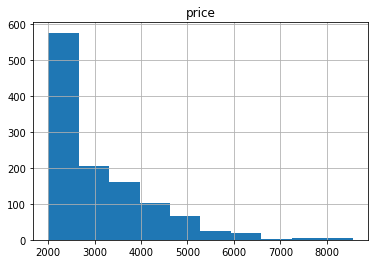

In [0]:
dfs[dfs['price']>2000].hist(column='price')


In [0]:
df2=df0[['gender','category','price','size','brand']]
df2.head(2)

,gender,category,price,size,brand
0,unisex,bodysuits,99,44,h&m
1,unisex,bodysuits,99,50,h&m


In [0]:
df2['price'].unique().size

981

In [0]:
df2['category'].unique().size

13

In [0]:
df2['brand'].unique().size

586

In [0]:
import numpy as np
np.set_printoptions(threshold=np.inf)
df2['price'].dtype
df2['price'].unique()

array([  99,  179,   50,   30,   40,   15,   20,  149,  129,   70,   24,
        199,   80,   60,   90,  249,  399,   25,  499,  299,  159,  229,
        349,   11,  100,   10,   75,  699,  279,  119,   64,  449,  379,
         49,   79,  109,   89,   59,  139,  289,  339,  219,   69,  599,
        529,  169,  189,  209,  269,  259,  239,  419,  395,  132,  400,
        329,  380,  280,  450,   39,  429,  439,  309,  359,  389,  369,
        689,  479,  579,  319,  549,  489,  679,  799,  609,  469,  539,
        409,  509,  559,  245,  110,  130,  254,  224,  459,  949,  300,
        240,  480,  200,  600,  520,  560,  440,  220,  180,  320,  140,
        260,  880,    1,   72,  960,   55,  360,   32,  640,  160,  680,
        519,  800,   96,   74,  150,  124,  174,  114,  112,  187,  104,
        107,  125,  134,  172,   97,  210,  262,   44,   41,   35,  979,
        879,  230,  170, 1045,  929,  250,  324,  779,  909,  669,  619,
        859,  432, 1495,  589,  629,  719,  649,  7

In [0]:
df2['size'].unique().size

240

In [0]:
df2['size']=df2['size'].astype('str')

/home/jupyter/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# list=['L','No Size','XS','XL','SL','M','S']
list=['SL']
df3=df2
for l in list:
  df3=df3[df3['size']!=l]

In [0]:
df3['size']=df3['size'].map(lambda x:x.replace('No Size','no size'))

/home/jupyter/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# df3['size']=df3['size'].astype('int64')
# df3['size'].dtype

In [0]:
df3['size'].unique()#sl only remove #no size, xl,xs,sl,s,m,l

array(['44', '50', '56', '62', '68', '74', '80', '86', '92', '98', '104',
       '110', '116', '122', '128', '134', '130', '136', '152', '158',
       '164', '170', '51', '52', '53', '54', '55', '57', '58', '59', '60',
       '61', '63', '64', '65', '66', '67', '69', '70', '71', '72', '73',
       '75', '76', '77', '78', '79', '93', '94', '95', '96', '97', '99',
       '100', '101', '102', '103', '111', '112', '113', '114', '115',
       '123', '124', '125', '126', '127', '81', '82', '83', '84', '85',
       '87', '88', '89', '90', '91', '46', '47', '48', 'no size', '34',
       '45', '129', '131', '132', '133', '135', '137', '138', '139',
       '140', '141', '142', '143', '144', '145', '146', '147', '148',
       '149', '150', '42', '43', '38', 'S', 'M', 'L', '120', '117', '118',
       '119', '121', '151', '153', '154', '155', '156', '157', '159',
       '160', '161', '162', '163', '165', '166', '167', '168', '169',
       '36', '37', '40', '41', '105', '106', '107', '108', '109', '

In [0]:
df3['brand']=df3['brand'].map(lambda x: x.replace('unauthorized', 'no brand'))
df3[df3['brand']=='unauthorized']



/home/jupyter/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gender,category,price,size,brand


In [0]:
df3.head(2)

,gender,category,price,size,brand
0,unisex,bodysuits,99,44,h&m
1,unisex,bodysuits,99,50,h&m


In [0]:
X=df3[['size','gender','category','brand']]
X=pd.get_dummies(data=X)
X[0:3]


,size_0,size_1,size_10,size_100,size_101,size_102,size_103,size_104,size_105,size_106,...,brand_wynken,brand_young soles,brand_young versace,brand_yporqué,brand_zadig & voltaire,brand_zalando essentials kids,brand_zara,brand_zip and zoe,brand_zunblock,brand_åhléns
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
Y=df3[['price']]
Y[0:3]

,price
0,99
1,99
2,99


In [0]:
# df2['brand'].unique() #no brand
dt={}
dt['X']=X
dt['y']=Y


In [0]:
# train['y']=train['y'].astype('int64')
# train['X']=train['X'].astype('float32')

In [0]:
dt['y'].shape

(522428, 1)

In [0]:
import numpy as np
# np.unique(train['y'])

In [0]:
dt['X'].shape

(522428, 819)

In [0]:
# train['X']=train['X'].to_numpy()
type(dt['X']) 

pandas.core.frame.DataFrame

In [0]:
# train['y']=train['y'].to_numpy()
type(dt['y']) 

pandas.core.frame.DataFrame

In [0]:
import time
start_time = time.time()
print('Start time in seconds is : {}'.format(start_time))

Start time in seconds is : 1567800984.1059225


In [0]:
# train['y']=train['y'].astype('int64')
# train['X']=train['X'].astype('float32')

In [0]:
from sklearn.model_selection import train_test_split
# now we use the train_test_split function already available in sklearn library to split our data set
trainX, testX, Y_train, Y_test = train_test_split(dt['X'], dt['y'], test_size = .10, random_state = 42)

In [0]:
trainX.shape

(470185, 819)

In [0]:
# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (this will lead to
# better training and convergence)
maxPrice = Y_train.max()
trainY = Y_train / maxPrice
testY = Y_test / maxPrice

In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
 
def create_mlp(dim):
  model = Sequential()
    # define our MLP network
  model.add(Dense(500, activation='relu', input_dim=dim))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation="linear"))
  return model
   



In [0]:
trainX.shape[1]

819

In [0]:
model2=create_mlp(trainX.shape[1])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               410000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               50100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 465,201
Trainable params: 465,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [0]:
#lr = self.lr * (1. / (1. + self.decay * self.iterations))


In [0]:
# Regression with KerasPython
# create our MLP and then compile the model using mean absolute
# percentage error as our loss, implying that we seek to minimize
# the absolute percentage difference between our price *predictions*
# and the *actual prices*
from keras.optimizers import adam

model = create_mlp(trainX.shape[1])
opt = adam(lr=1e-3, decay=1e-3 / 100)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

# train the model
print("[INFO] training model...")
model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=8)


In [0]:
model.save('smart_price3.h5')

In [0]:
!du -h smart_price.h5

In [0]:
Y_train.max()

In [0]:
testY=testY.astype('float32')

In [0]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(testX)
 
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean


In [0]:
import tensorflow as tf #classification
tf.metrics.accuracy(preds, testY)

In [0]:
std

In [0]:
testY[11500]

In [0]:
Y_train.max()

In [0]:
testY=testY.to_numpy()

In [0]:
print(testY[11500]*Y_train.max())
preds[11500]*Y_train.max()

In [0]:
print(testY[25000]*Y_train.max())
preds[25000]*Y_train.max()

In [0]:
print(testY[1000]*Y_train.max())
preds[1000]*Y_train.max()

In [0]:
print(testY[2750]*Y_train.max())
preds[2750]*Y_train.max()

In [0]:
# testY

In [0]:
# type(testY.to_numpy())

In [0]:
preds.dtype

In [0]:
testY.size